# Imports and Functions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import cv2

def load_dataframe(file_path):
    """Load a DataFrame from a CSV file."""
    return pd.read_csv(file_path, index_col=0)

def create_subplots(num_rows, num_cols):
    """Create subplots based on the number of rows and columns."""
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten() if num_rows > 1 else [axs]  # Flatten if there is more than one row
    return fig, axs

def annotate_bar_plot(ax, heights):
    """Add numerical annotations to a bar plot."""
    for i, height in enumerate(heights):
        ax.text(i, height, f'{height}', ha='center', va='bottom', color='black', fontsize=10)

def scatter_plot_sternal_notches(df, ax, center_name):
    """Create a scatter plot for sternal notch coordinates."""
    valid_coordinates = df.dropna(subset=['scale_x', 'scale_y', 'sternal_notch_x', 'sternal_notch_y'])
    unique_centers = df['center'].unique() if center_name is None else [center_name]

    for center in unique_centers:
        center_data = valid_coordinates[valid_coordinates['center'] == center]
        ax.scatter(center_data['scale_x'], center_data['scale_y'], label=f'Sternal Notch top - {center}')
        ax.scatter(center_data['sternal_notch_x'], center_data['sternal_notch_y'], label=f'Sternal Notch bottom - {center}')

    ax.set_title(f'Scatter Plot of Sternal Notch Coordinates- {center}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.legend()
    ax.grid(True)

def scatter_plot_angles(df, ax, center_name=None):
    """Create a scatter plot for angles."""
    valid_angles = df.dropna(subset=['Angle'])
    
    unique_centers = df['center'].unique() if center_name is None else [center_name]
    for center in unique_centers:
        center_data = valid_angles[valid_angles['center'] == center]
        ax.scatter(center_data.index, center_data['Angle'], color='orange')

    ax.set_title(f'Scatter Plot of Angles between Sternal Notches- {center}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Angle (degrees)')
    ax.grid(True)

def bar_plot_flag_types(df, ax, center_name=None):
    """Create a bar plot for flag types."""
    valid_flags = df.dropna(subset=['flag'])
    unique_centers = df['center'].unique() if center_name is None else [center_name]

    for center in unique_centers:
        center_data = valid_flags[valid_flags['center'] == center]
        flag_counts = center_data['flag'].value_counts().sort_index()
        ax.bar(flag_counts.index, flag_counts, color=['green', 'blue', 'orange', 'red'])

        ax.set_title(f'Bar Plot of Flag Types for Sternal Notches - {center}')
        ax.set_xlabel('Flag Type')
        ax.set_ylabel('Count')
        ax.grid(axis='y')
        annotate_bar_plot(ax, flag_counts)



def distance_plot(df, ax):
    """Create a distance plot using boxplot for each center."""
    df_filtered = df.dropna(subset=['distance'])
    ax.figure(figsize=(16, 6))
    
    # Create a box plot for each center
    sns.boxplot(x='center', y='distance', data=df_filtered, palette='viridis', ax=ax)

    # Add numerical annotations
    medians = df_filtered.groupby('center')['distance'].median()
    mins = df_filtered.groupby('center')['distance'].min()
    maxs = df_filtered.groupby('center')['distance'].max()

    for i, center in enumerate(df_filtered['center'].unique()):
        ax.text(i, medians[center], f'Median: {medians[center]:.2f}', ha='center', va='bottom', color='black', fontsize=10)
        ax.text(i, mins[center], f'Min: {mins[center]}', ha='center', va='top', color='blue', fontsize=10)
        ax.text(i, maxs[center], f'Max: {maxs[center]}', ha='center', va='bottom', color='red', fontsize=10)

    ax.set_title('Distribution of Distances for Each Center')
    ax.set_xlabel('Center')
    ax.set_ylabel('Distance (pixels)')


def sternal_notch_confidence_plot(df, ax):
    """Create a plot for sternal notch confidence scores against angles."""
    valid_data = df.dropna(subset=['Angle', 'sternal_notch_conf'])
    
    ax.scatter(valid_data['Angle'], valid_data['sternal_notch_conf'], label='Sternal Notch Confidence', alpha=0.5)

    ax.set_title('Sternal Notch Confidence Scores vs Angle')
    ax.set_xlabel('Angle (degrees)')
    ax.set_ylabel('Sternal Notch Confidence Scores')
    ax.legend()
    ax.grid(True)

def scale_confidence_plot(df, ax):
    """Create a plot for scale confidence scores against angles."""
    valid_data = df.dropna(subset=['Angle', 'scale_conf'])
    
    ax.scatter(valid_data['Angle'], valid_data['scale_conf'], label='Scale Confidence', alpha=0.5)

    ax.set_title('Scale Confidence Scores vs Angle')
    ax.set_xlabel('Angle (degrees)')
    ax.set_ylabel('Scale Confidence Scores')
    ax.legend()
    ax.grid(True)
    
    
def mean_confidence_plot(df, ax):
    """Create a plot for mean confidence scores against angles."""
    # Calculate the mean confidence scores for each angle
    df['mean_confidence'] = df[['sternal_notch_conf', 'scale_conf']].mean(axis=1)

    ax.scatter(df['Angle'], df['mean_confidence'], label='Mean Confidence', alpha=0.5)

    ax.set_title('Mean Confidence Scores vs Angle (degrees)')
    ax.set_xlabel('Angle (degrees)')
    ax.set_ylabel('Mean Confidence Scores')
    ax.legend()
    ax.grid(True)
    

c:\Users\student\anaconda3\envs\yolo_test_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\student\anaconda3\envs\yolo_test_env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\student\anaconda3\envs\yolo_test_env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Main execution

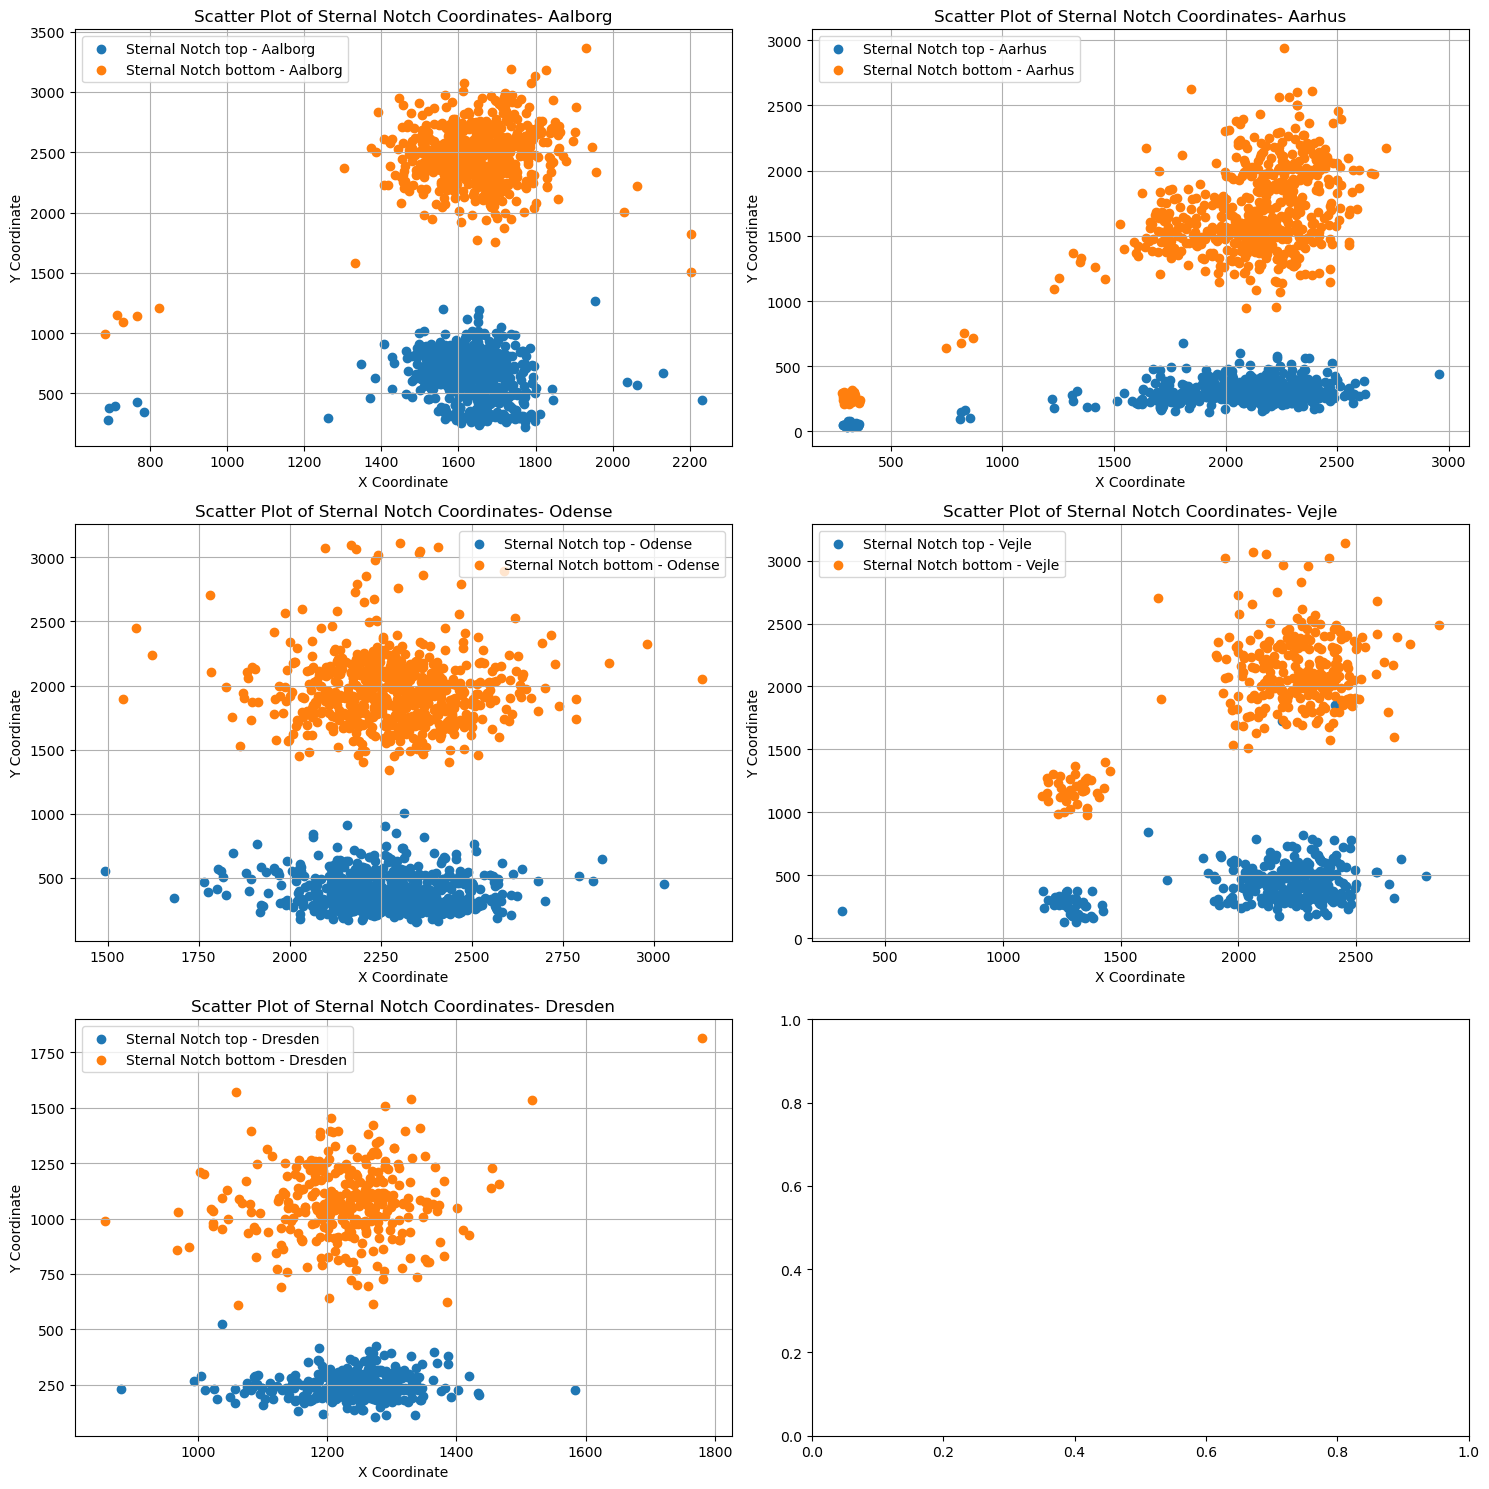

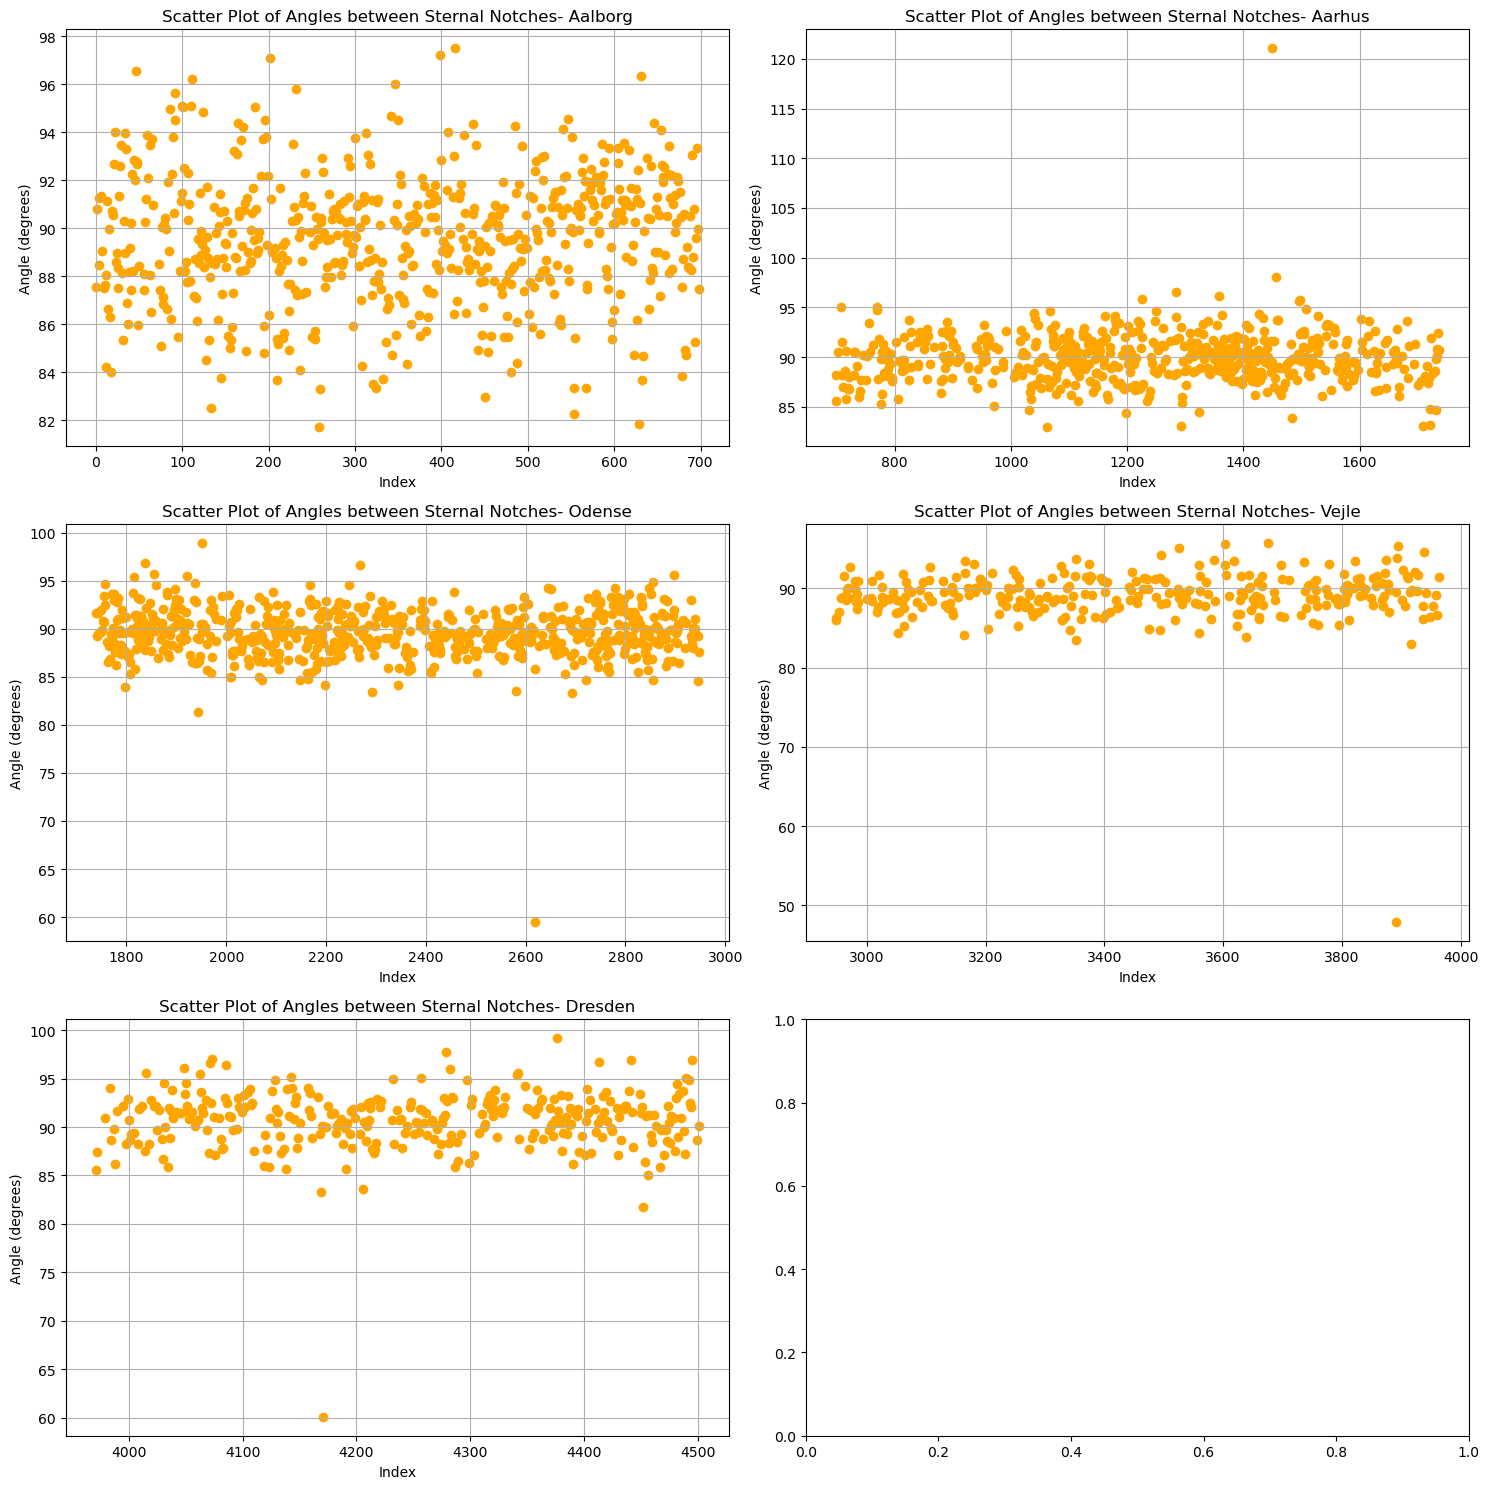

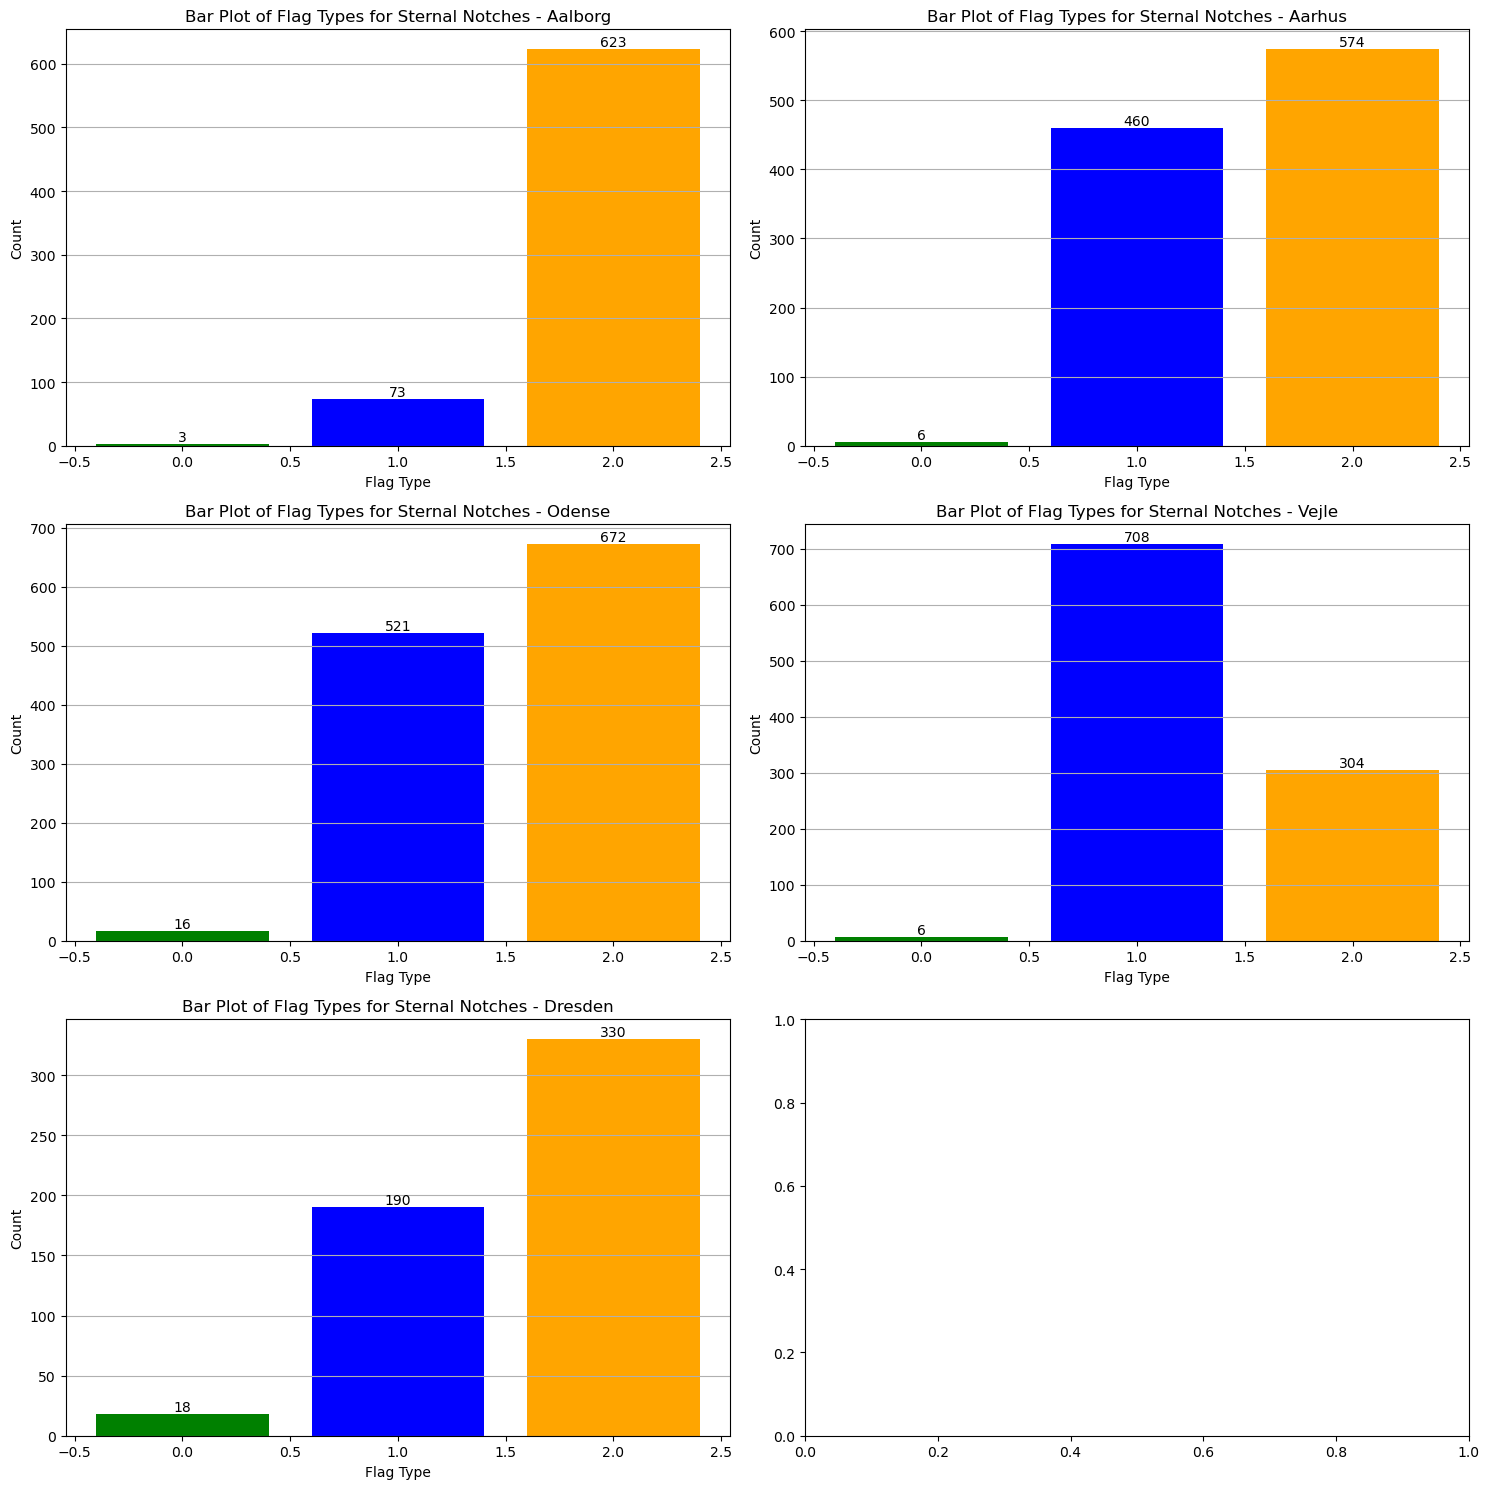

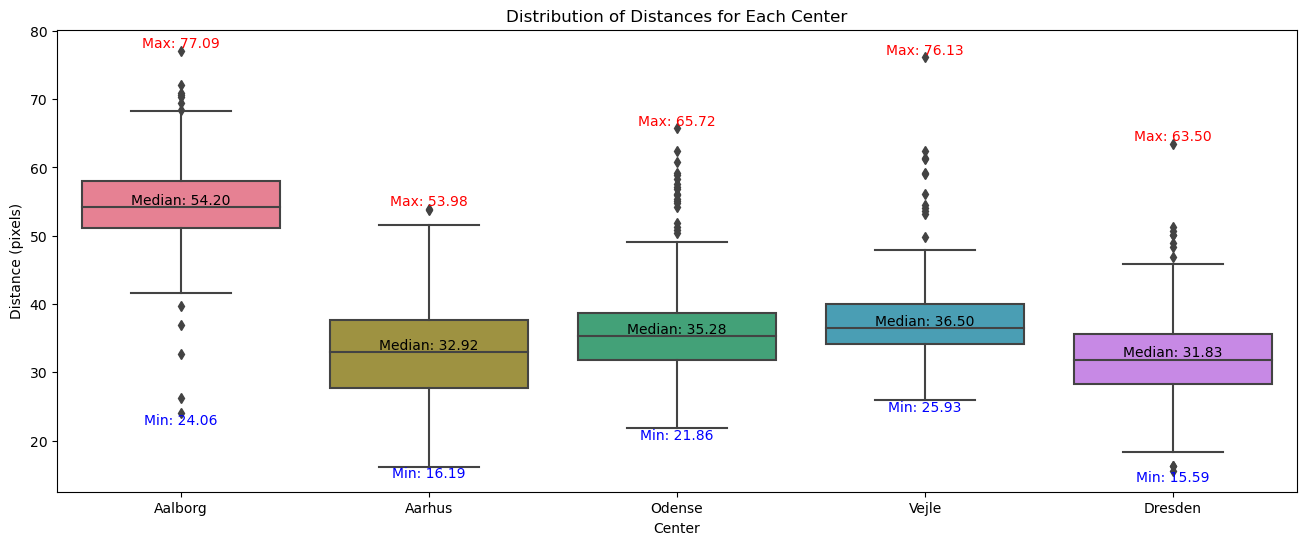

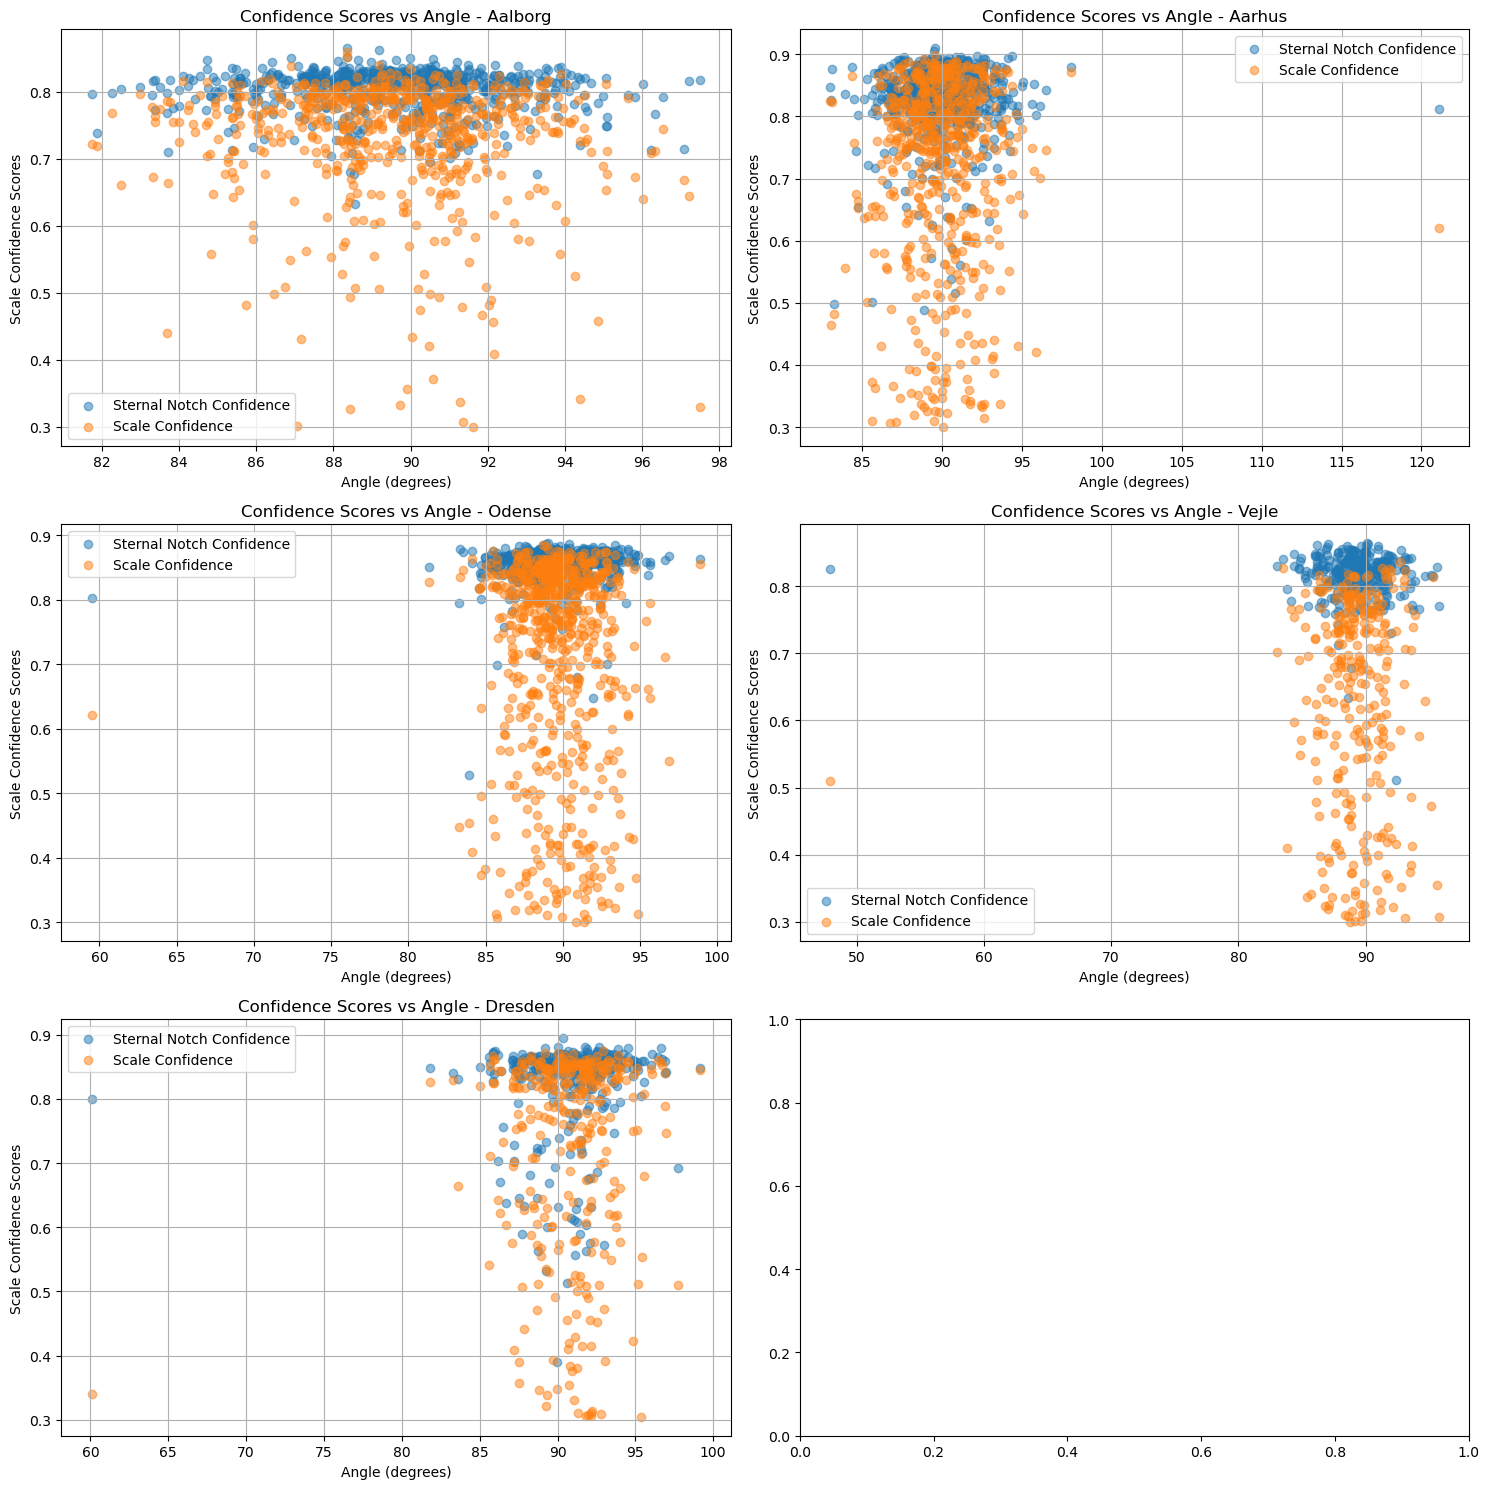

In [2]:
if __name__ == "__main__":
    # Load the DataFrame from the CSV file
    df_results = load_dataframe('../NMS_based_df_procent.csv')

    # Get unique center names
    unique_centers = df_results['center'].unique()

    # Calculate the number of rows and columns for subplots
    num_cols = 2  # You can adjust the number of columns
    num_rows = int(np.ceil(len(unique_centers) / num_cols))

    # Plot sternal notches, angles, and flag types for each center
    for plot_function in [scatter_plot_sternal_notches, scatter_plot_angles, bar_plot_flag_types]:
        # Create subplots
        fig, axs = create_subplots(num_rows, num_cols)

        # Create separate subplots for each center
        for i, center_name in enumerate(unique_centers):
            # Plot for the specific center
            plot_function(df_results, axs[i], center_name)

        # Adjust layout for better spacing
        plt.tight_layout()

        # Show the combined plot
        plt.show()

    # Filter out rows where distance is not available
    df_filtered = df_results.dropna(subset=['distance'])

    # Set a larger figure size
    plt.figure(figsize=(16, 6))

    # Create a box plot for each center
    ax = sns.boxplot(x='center', y='distance', data=df_filtered, palette='husl')

    # Add numerical annotations
    medians = df_filtered.groupby('center')['distance'].median()
    mins = df_filtered.groupby('center')['distance'].min()
    maxs = df_filtered.groupby('center')['distance'].max()

    for i, center in enumerate(df_filtered['center'].unique()):
        ax.text(i, medians[center], f'Median: {medians[center]:.2f}', ha='center', va='bottom', color='black', fontsize=10)
        ax.text(i, mins[center], f'Min: {mins[center]:.2f}', ha='center', va='top', color='blue', fontsize=10)
        ax.text(i, maxs[center], f'Max: {maxs[center]:.2f}', ha='center', va='bottom', color='red', fontsize=10)

    plt.title('Distribution of Distances for Each Center')
    plt.xlabel('Center')
    plt.ylabel('Distance (pixels)')
    plt.show()

    # Create subplots for confidence scores vs angle for each center
    fig, axs = create_subplots(num_rows, num_cols)

    for i, center_name in enumerate(unique_centers):
        # Filter data for the specific center
        center_data = df_results[df_results['center'] == center_name].copy()

        # Scatter plot for sternal notch confidence and angles
        sternal_notch_confidence_plot(center_data, axs[i])

        # Scatter plot for scale confidence and angles
        scale_confidence_plot(center_data, axs[i])

        # Calculate mean confidence scores for each angle using .loc to avoid the warning
        #center_data.loc[:, 'mean_confidence'] = center_data[['sternal_notch_conf', 'scale_conf']].mean(axis=1)

        # Scatter plot for mean confidence and angles
        #mean_confidence_plot(center_data, axs[i])

        # Set subplot title
        axs[i].set_title(f'Confidence Scores vs Angle - {center_name}')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the combined plot
    plt.show()


# Comparison

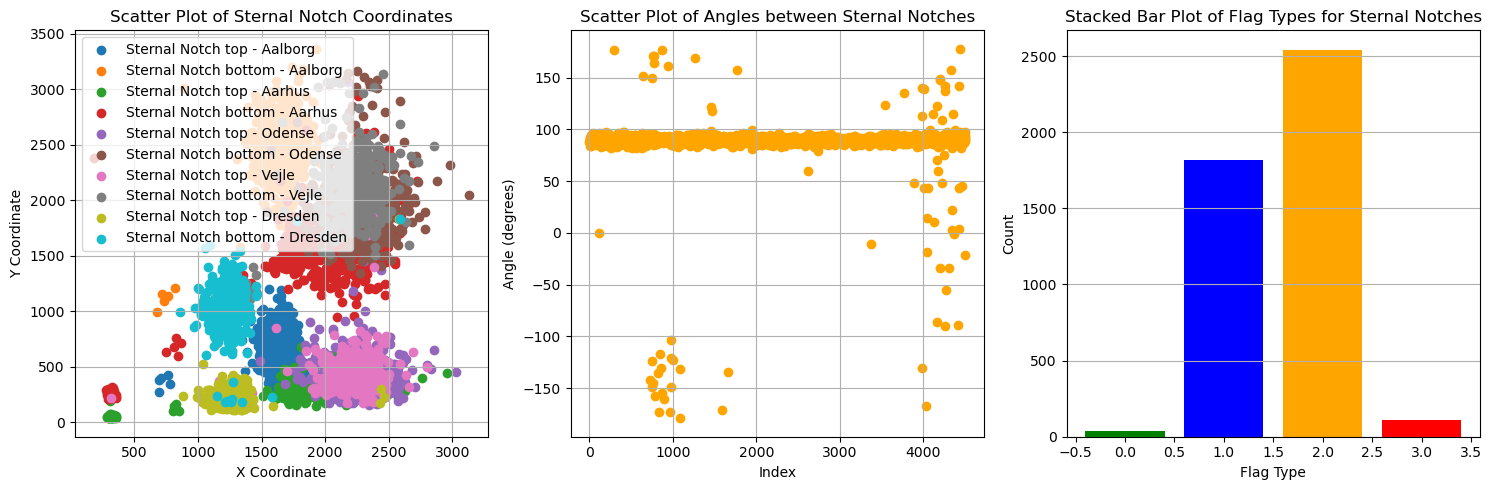

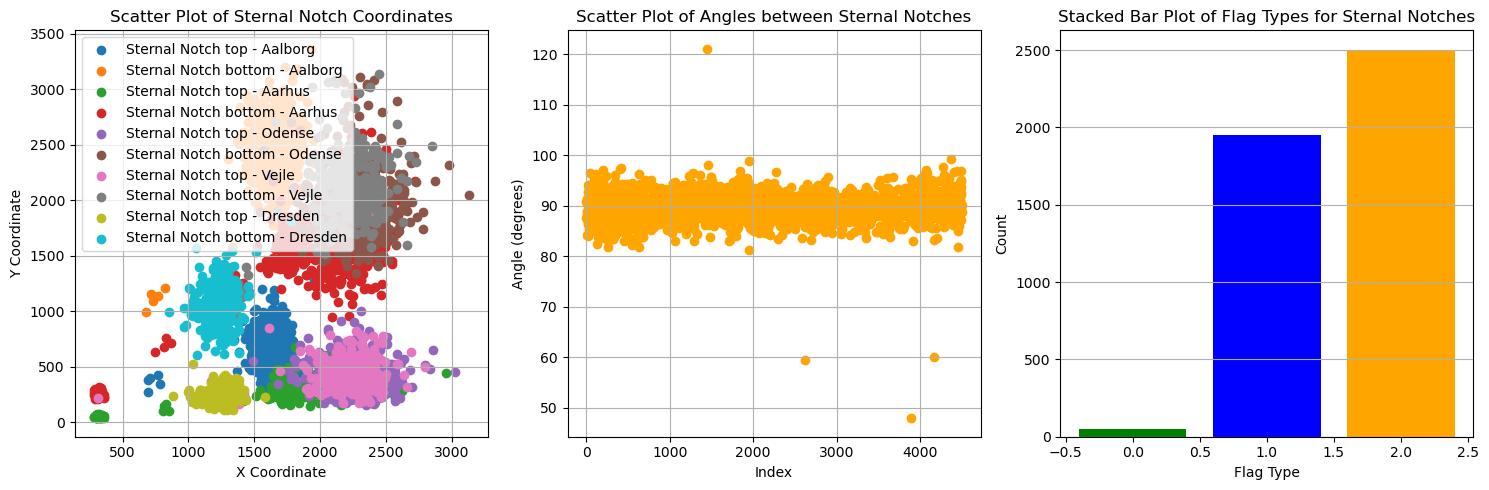

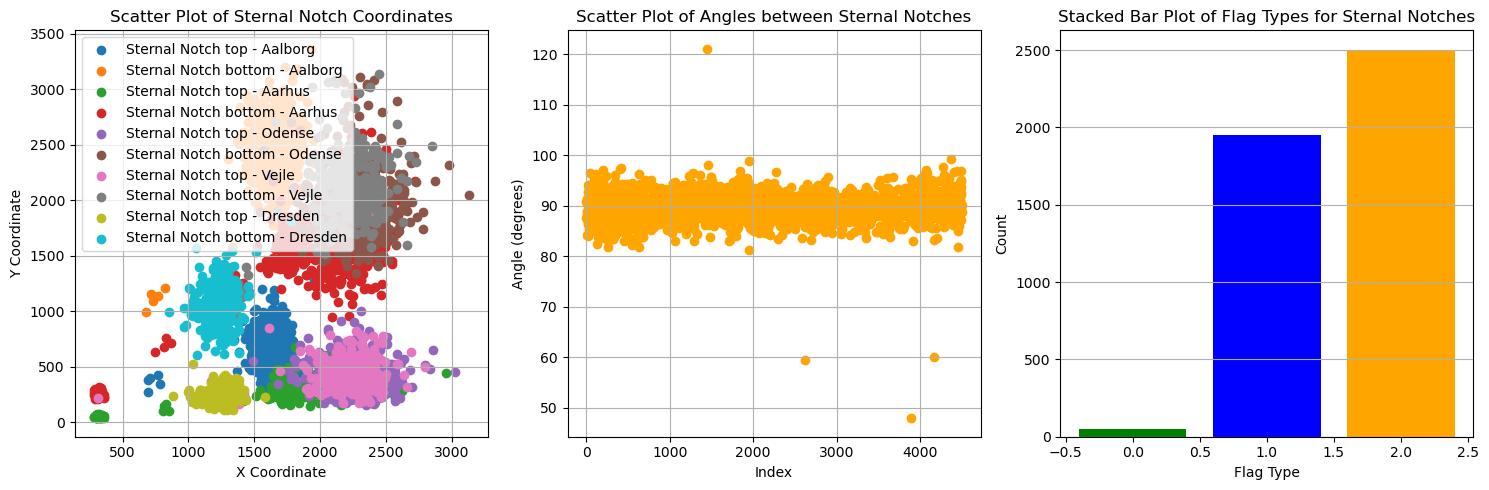

In [3]:

def sternal_notches(df, ax):
    """
    Create a scatter plot for sternal notch coordinates.

    Parameters:
    - df (pd.DataFrame): DataFrame containing sternal notch data.
    - ax (matplotlib.axes._subplots.AxesSubplot): Subplot to plot on.
    """
    # Filter out rows with valid sternal notch coordinates
    valid_coordinates = df.dropna(subset=['scale_x', 'scale_y', 'sternal_notch_x', 'sternal_notch_y'])

    # Get unique center names
    unique_centers = df['center'].unique()

    # Plotting the scatter plot with unique colors for each center
    for center in unique_centers:
        center_data = valid_coordinates[valid_coordinates['center'] == center]
        ax.scatter(center_data['scale_x'], center_data['scale_y'], label=f'Sternal Notch top - {center}')
        ax.scatter(center_data['sternal_notch_x'], center_data['sternal_notch_y'], label=f'Sternal Notch bottom - {center}')

    ax.set_title('Scatter Plot of Sternal Notch Coordinates')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.legend()
    ax.grid(True)


def plot_angles(df, ax):
    """
    Create a scatter plot for angles.

    Parameters:
    - df (pd.DataFrame): DataFrame containing angle data.
    - ax (matplotlib.axes._subplots.AxesSubplot): Subplot to plot on.
    """
    # Filter out rows with valid angles
    valid_angles = df.dropna(subset=['Angle'])

    # Plotting the scatter plot for angles
    ax.scatter(valid_angles.index, valid_angles['Angle'], color='orange')

    ax.set_title('Scatter Plot of Angles between Sternal Notches')
    ax.set_xlabel('Index')
    ax.set_ylabel('Angle (degrees)')
    ax.grid(True)

def flag_types(df, ax):
    """
    Create a bar plot for flag types.

    Parameters:
    - df (pd.DataFrame): DataFrame containing flag data.
    - ax (matplotlib.axes._subplots.AxesSubplot): Subplot to plot on.
    """
    # Filter out rows with valid flag types
    valid_flags = df.dropna(subset=['flag'])

    # Count occurrences of each flag category
    flag_counts = valid_flags['flag'].value_counts().sort_index()

    # Plotting the stacked bar plot for flag types
    ax.bar(flag_counts.index, flag_counts, color=['green', 'blue', 'orange', 'red'])

    ax.set_title('Stacked Bar Plot of Flag Types for Sternal Notches')
    ax.set_xlabel('Flag Type')
    ax.set_ylabel('Count')
    ax.grid(axis='y')

if __name__ == "__main__":
    # Load the DataFrame from the CSV file
    df_NMS = pd.read_csv('../NMS_based_df.csv', index_col=0)
    df_angle = pd.read_csv('../angle_based_df.csv', index_col=0)
    df_procent = pd.read_csv('../NMS_based_df_procent.csv', index_col=0)
    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Scatter plot for sternal notches
    sternal_notches(df_angle, axs[0])
    # Scatter plot for angles
    plot_angles(df_angle, axs[1])
    # Bar plot for flag types
    flag_types(df_angle, axs[2])  # Use axs[1, 0] instead of axs[1, :]
    

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Scatter plot for sternal notches
    sternal_notches(df_NMS, axs[0])
    # Scatter plot for angles
    plot_angles(df_NMS, axs[1])
    # Bar plot for flag types
    flag_types(df_NMS, axs[2])  # Use axs[1, 0] instead of axs[1, :]
    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Scatter plot for sternal notches
    sternal_notches(df_procent, axs[0])
    # Scatter plot for angles
    plot_angles(df_procent, axs[1])
    # Bar plot for flag types
    flag_types(df_procent, axs[2])  # Use axs[1, 0] instead of axs[1, :]
    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()

# more tests

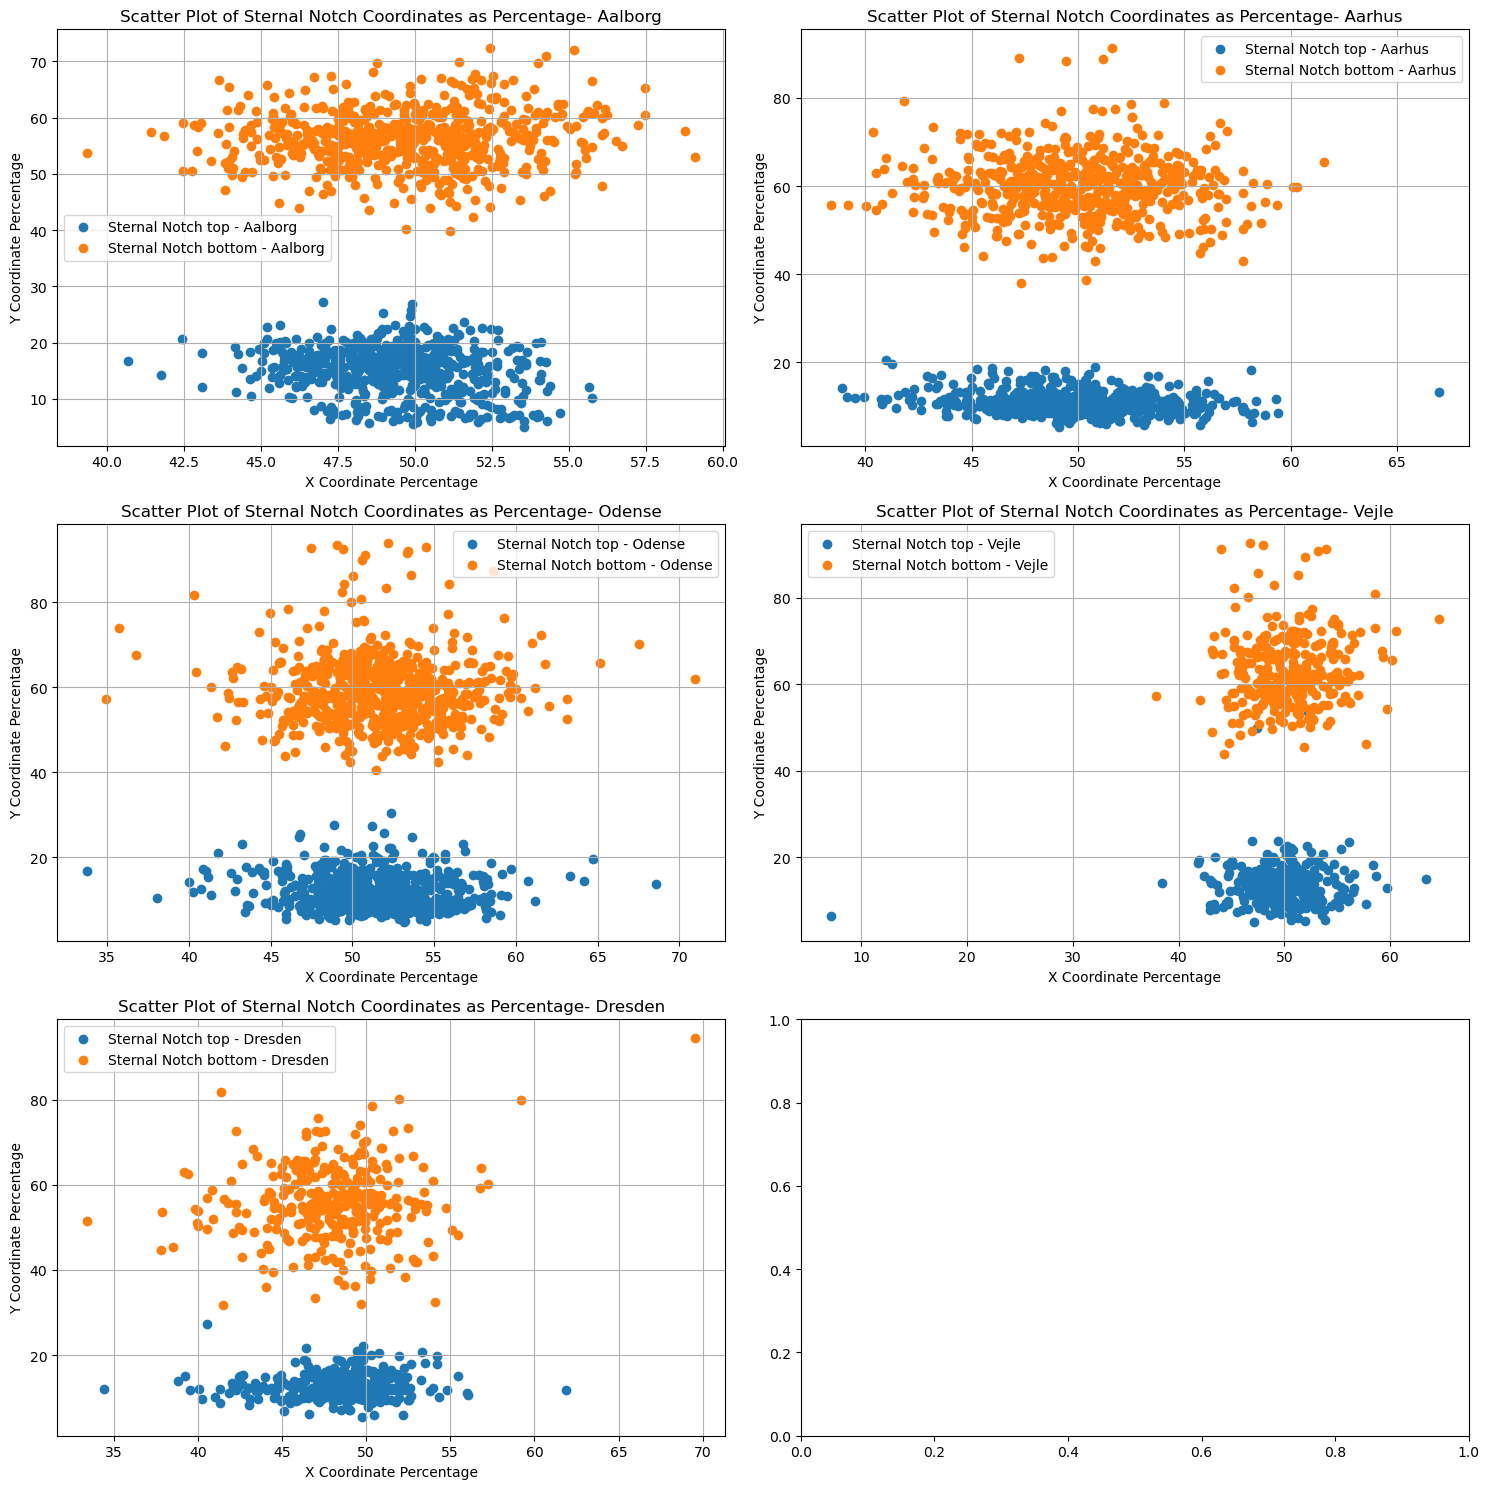

In [4]:
from PIL import Image

def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height

def scatter_plot_sternal_notches_percentage(df, ax, center_name):
    """Create a scatter plot for sternal notch coordinates as a percentage of the image size."""
    valid_coordinates = df.dropna(subset=['scale_x', 'scale_y', 'sternal_notch_x', 'sternal_notch_y'])
    unique_centers = df['center'].unique() if center_name is None else [center_name]

    for center in unique_centers:
        center_data = valid_coordinates[valid_coordinates['center'] == center].copy()

        # Handle the case where the image loading fails
        try:
            # Read image dimensions from the image path
            center_data.loc[:, 'image_height'] = center_data['image_path'].apply(lambda path: get_image_dimensions(path)[1])
            center_data.loc[:, 'image_width'] = center_data['image_path'].apply(lambda path: get_image_dimensions(path)[0])
        except Exception as e:
            print(f"Error loading image dimensions for center {center}: {e}")
            continue

        # Calculate sternal notch coordinates as a percentage of the image size
        center_data.loc[:, 'scale_x_percentage'] = center_data['scale_x'] / center_data['image_width'] * 100
        center_data.loc[:, 'scale_y_percentage'] = center_data['scale_y'] / center_data['image_height'] * 100
        center_data.loc[:, 'sternal_notch_x_percentage'] = center_data['sternal_notch_x'] / center_data['image_width'] * 100
        center_data.loc[:, 'sternal_notch_y_percentage'] = center_data['sternal_notch_y'] / center_data['image_height'] * 100

        # Create scatter plot
        ax.scatter(center_data['scale_x_percentage'], center_data['scale_y_percentage'], label=f'Sternal Notch top - {center}')
        ax.scatter(center_data['sternal_notch_x_percentage'], center_data['sternal_notch_y_percentage'], label=f'Sternal Notch bottom - {center}')

    ax.set_title(f'Scatter Plot of Sternal Notch Coordinates as Percentage- {center}')
    ax.set_xlabel('X Coordinate Percentage')
    ax.set_ylabel('Y Coordinate Percentage')
    ax.legend()
    ax.grid(True)


if __name__ == "__main__":
    # Load the DataFrame from the CSV file
    df_results = load_dataframe('../NMS_based_df_procent.csv')

    # Get unique center names
    unique_centers = df_results['center'].unique()

    # Calculate the number of rows and columns for subplots
    num_cols = 2  # You can adjust the number of columns
    num_rows = int(np.ceil(len(unique_centers) / num_cols))

    # Create subplots
    fig, axs = create_subplots(num_rows, num_cols)

    # Create separate subplots for each center
    for i, center_name in enumerate(unique_centers):
        # Scatter plot for sternal notches as a percentage of the image size for the specific center
        scatter_plot_sternal_notches_percentage(df_results, axs[i], center_name)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the combined plot
    plt.show()


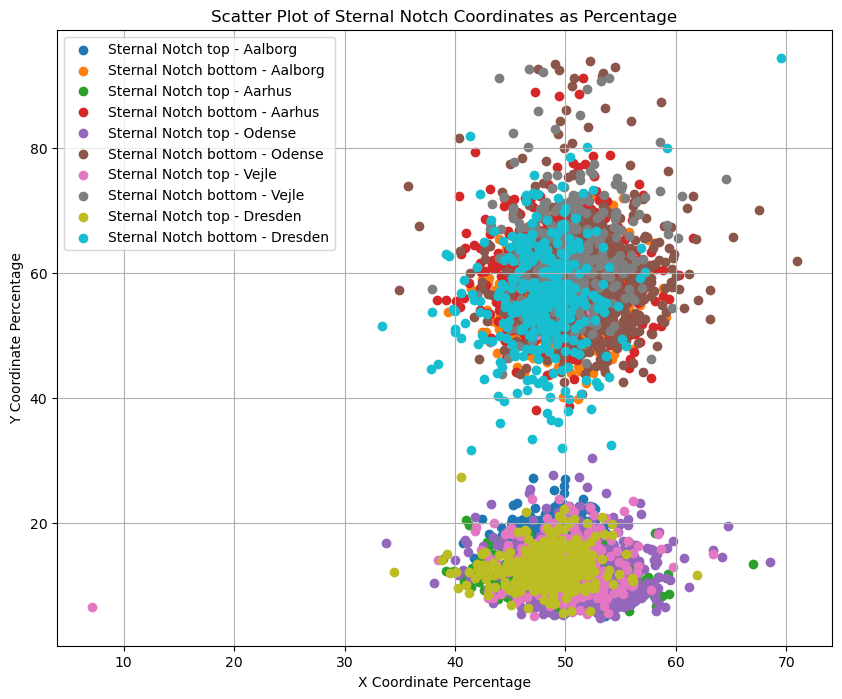

In [12]:
from PIL import Image

# Define the get_image_dimensions function
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height

# Define the scatter_plot_sternal_notches_percentage function
def scatter_plot_sternal_notches_percentage(df, ax, center_name):
    valid_coordinates = df.dropna(subset=['scale_x', 'scale_y', 'sternal_notch_x', 'sternal_notch_y'])
    unique_centers = df['center'].unique() if center_name is None else [center_name]

    for center in unique_centers:
        center_data = valid_coordinates[valid_coordinates['center'] == center].copy()

        try:
            center_data.loc[:, 'image_height'] = center_data['image_path'].apply(lambda path: get_image_dimensions(path)[1])
            center_data.loc[:, 'image_width'] = center_data['image_path'].apply(lambda path: get_image_dimensions(path)[0])
        except Exception as e:
            print(f"Error loading image dimensions for center {center}: {e}")
            continue

        center_data.loc[:, 'scale_x_percentage'] = center_data['scale_x'] / center_data['image_width'] * 100
        center_data.loc[:, 'scale_y_percentage'] = center_data['scale_y'] / center_data['image_height'] * 100
        center_data.loc[:, 'sternal_notch_x_percentage'] = center_data['sternal_notch_x'] / center_data['image_width'] * 100
        center_data.loc[:, 'sternal_notch_y_percentage'] = center_data['sternal_notch_y'] / center_data['image_height'] * 100

        ax.scatter(center_data['scale_x_percentage'], center_data['scale_y_percentage'], label=f'Sternal Notch top - {center}')
        ax.scatter(center_data['sternal_notch_x_percentage'], center_data['sternal_notch_y_percentage'], label=f'Sternal Notch bottom - {center}')

    ax.set_title(f'Scatter Plot of Sternal Notch Coordinates as Percentage')
    ax.set_xlabel('X Coordinate Percentage')
    ax.set_ylabel('Y Coordinate Percentage')
    ax.legend()
    ax.grid(True)

# Consolidated main execution
if __name__ == "__main__":
    # Load the DataFrame from the CSV file
    df_results = load_dataframe('../NMS_based_df_procent.csv')

    # Create a single plot
    fig, ax = plt.subplots(figsize=(10, 8))

    # Scatter plot for sternal notches as a percentage of the image size for all centers
    scatter_plot_sternal_notches_percentage(df_results, ax, center_name=None)

    # Show the combined plot
    plt.show()


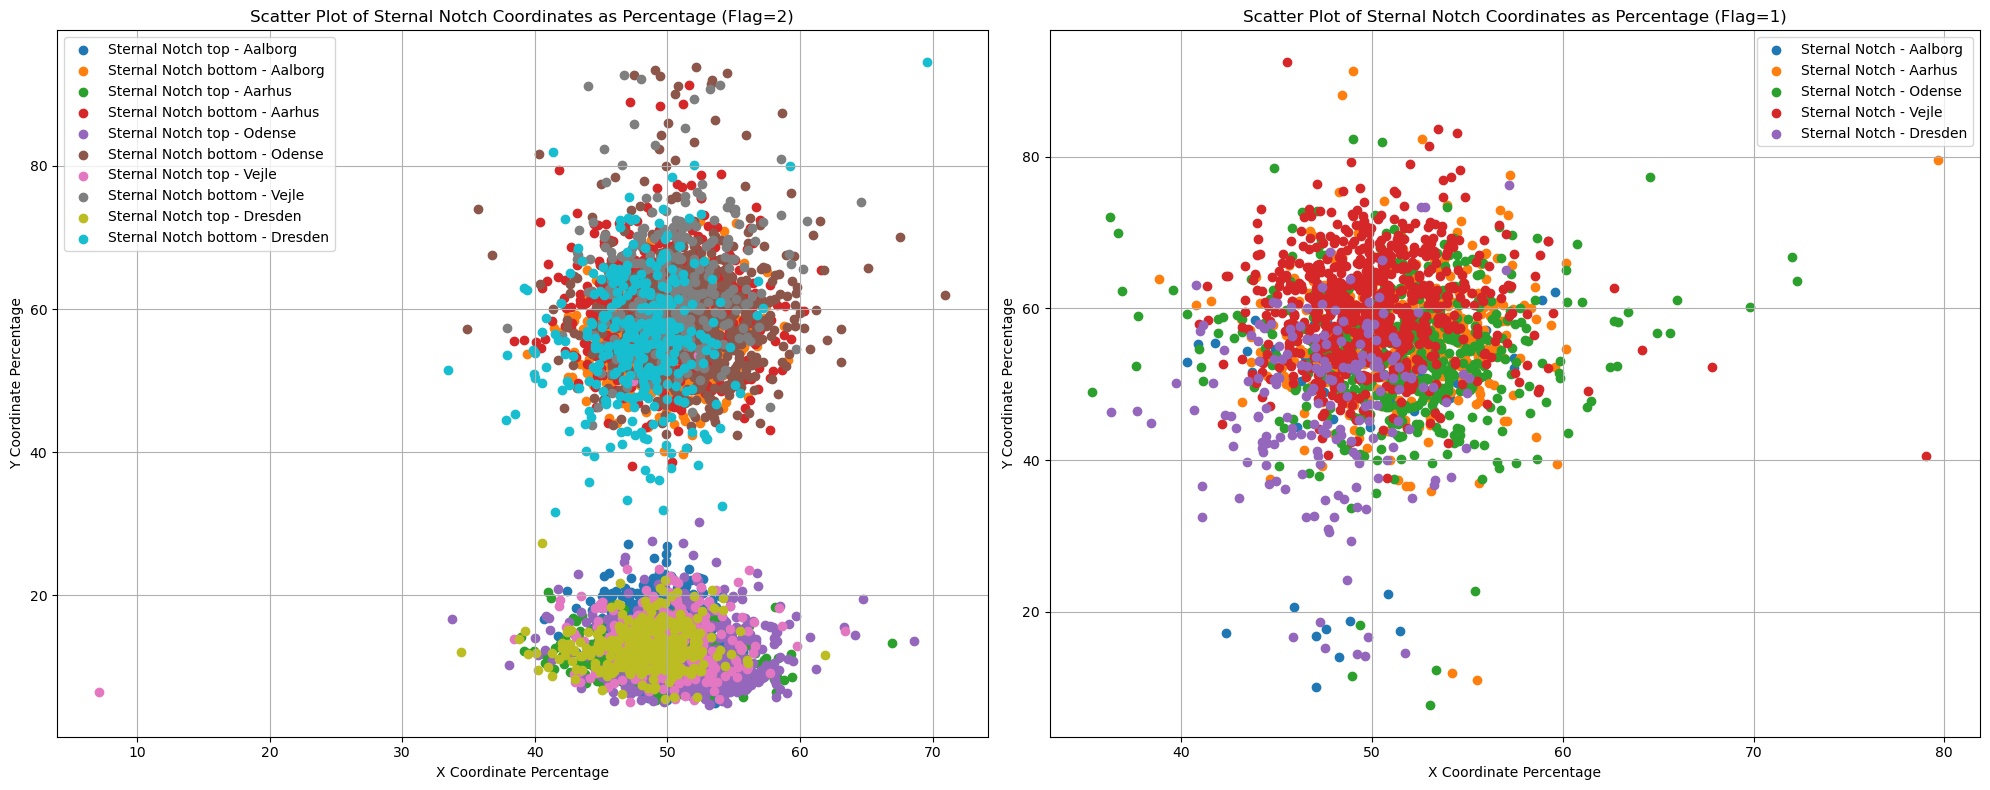

In [11]:
def scatter_plot_sternal_notches_percentage_flag(df, ax, center_name=None):
    valid_coordinates = df[df['flag'] == 2].dropna(subset=['scale_x', 'scale_y', 'sternal_notch_x', 'sternal_notch_y'])
    unique_centers = valid_coordinates['center'].unique() if center_name is None else [center_name]

    for center in unique_centers:
        center_data = valid_coordinates[valid_coordinates['center'] == center].copy()

        try:
            center_data.loc[:, 'image_height'] = center_data['image_path'].apply(lambda path: get_image_dimensions(path)[1])
            center_data.loc[:, 'image_width'] = center_data['image_path'].apply(lambda path: get_image_dimensions(path)[0])
        except Exception as e:
            print(f"Error loading image dimensions for center {center}: {e}")
            continue

        center_data.loc[:, 'scale_x_percentage'] = center_data['scale_x'] / center_data['image_width'] * 100
        center_data.loc[:, 'scale_y_percentage'] = center_data['scale_y'] / center_data['image_height'] * 100
        center_data.loc[:, 'sternal_notch_x_percentage'] = center_data['sternal_notch_x'] / center_data['image_width'] * 100
        center_data.loc[:, 'sternal_notch_y_percentage'] = center_data['sternal_notch_y'] / center_data['image_height'] * 100

        ax.scatter(center_data['scale_x_percentage'], center_data['scale_y_percentage'], label=f'Sternal Notch top - {center}')
        ax.scatter(center_data['sternal_notch_x_percentage'], center_data['sternal_notch_y_percentage'], label=f'Sternal Notch bottom - {center}')

    ax.set_title(f'Scatter Plot of Sternal Notch Coordinates as Percentage (Flag=2)')
    ax.set_xlabel('X Coordinate Percentage')
    ax.set_ylabel('Y Coordinate Percentage')
    ax.legend()
    ax.grid(True)
# Define the new scatter_plot_sternal_notches_flag_1 function
def scatter_plot_sternal_notches_percentage_flag_1(df, ax, center_name=None):
    valid_coordinates = df[df['flag'] == 1].dropna(subset=[ 'sternal_notch_x', 'sternal_notch_y'])
    unique_centers = valid_coordinates['center'].unique() if center_name is None else [center_name]

    for center in unique_centers:
        center_data = valid_coordinates[valid_coordinates['center'] == center].copy()

        try:
            center_data.loc[:, 'image_height'] = center_data['image_path'].apply(lambda path: get_image_dimensions(path)[1])
            center_data.loc[:, 'image_width'] = center_data['image_path'].apply(lambda path: get_image_dimensions(path)[0])
        except Exception as e:
            print(f"Error loading image dimensions for center {center}: {e}")
            continue

        center_data.loc[:, 'scale_x_percentage'] = center_data['sternal_notch_x'] / center_data['image_width'] * 100
        center_data.loc[:, 'scale_y_percentage'] = center_data['sternal_notch_y'] / center_data['image_height'] * 100

        # Check if there are any points to plot
        if not center_data.empty:
            ax.scatter(center_data['scale_x_percentage'], center_data['scale_y_percentage'], label=f'Sternal Notch - {center}')
            # ax.scatter(center_data['sternal_notch_x_percentage'], center_data['sternal_notch_y_percentage'], label=f'Sternal Notch bottom - {center}')

    ax.set_title(f'Scatter Plot of Sternal Notch Coordinates as Percentage (Flag=1)')
    ax.set_xlabel('X Coordinate Percentage')
    ax.set_ylabel('Y Coordinate Percentage')
    
    # Check if there are any labeled points before creating a legend
    if not ax.get_legend_handles_labels()[0]:
        print("No valid points to plot with label for Flag=1.")
    else:
        ax.legend()
        
    ax.grid(True)
# Consolidated main execution
if __name__ == "__main__":
    # Load the DataFrame from the CSV file
    df_results = load_dataframe('../NMS_based_df_procent.csv')

    # Create three subplots
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

    # Scatter plot for sternal notches as a percentage of the image size for all centers
    # scatter_plot_sternal_notches_percentage(df_results, ax[0], center_name=None)

    # Scatter plot for sternal notches with flag=2
    scatter_plot_sternal_notches_percentage_flag(df_results, ax[0], center_name=None)

    # Scatter plot for sternal notches with flag=1
    scatter_plot_sternal_notches_percentage_flag_1(df_results, ax[1], center_name=None)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the combined plot
    plt.show()
